c:\Users\Aleem Amjad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(



 Model Coefficients:

Area                           : 1331.4944
Bedrooms                       : -27.7841
Bathrooms                      : -1.3205
Stories                        : 5.8088
Garage                         : -3.3257
YearBuilt                      : -132.5268
DistanceToCity                 : -40.9340
Area^2                         : 0.0282
Area Bedrooms                  : 0.0948
Area Bathrooms                 : -33.6209
Area Stories                   : -51.8075
Area Garage                    : 27.7318
Area YearBuilt                 : -0.6269
Area DistanceToCity            : -3.4205
Bedrooms^2                     : -349.8425
Bedrooms Bathrooms             : 3104.5875
Bedrooms Stories               : 377.2232
Bedrooms Garage                : 1.0766
Bedrooms YearBuilt             : 5.4474
Bedrooms DistanceToCity        : 1029.8869
Bathrooms^2                    : -2049.7968
Bathrooms Stories              : -110.4080
Bathrooms Garage               : 948.5896
Bathrooms YearBuil

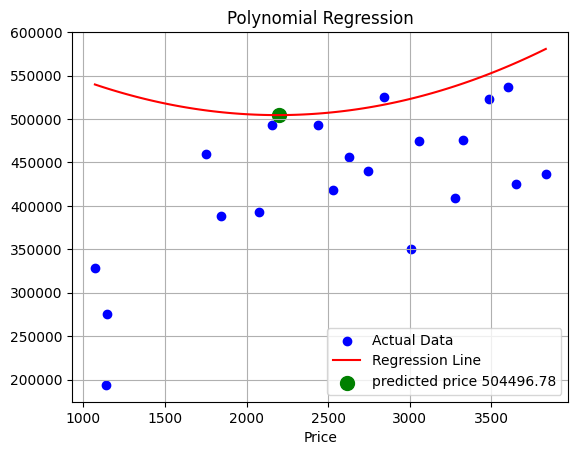

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
df=pd.read_csv('House_price.csv')
# print(df.head())
x=df[['Area'  ,'Bedrooms'  ,'Bathrooms'  ,'Stories',  'Garage',  'YearBuilt',  'DistanceToCity']]
y=df['Price']

# change x feature to poly with degree 2
poly=PolynomialFeatures(degree=2,include_bias=False)
poly_x=poly.fit_transform(x)

# Model Train
model=LinearRegression()
model.fit(poly_x,y)

# prediction new price
new_house=np.array([[2200,3,4,2,2,2019,2]])
new_house_poly=poly.transform(new_house)
new_price=model.predict(new_house_poly)

# Metrics MSE MAE RMSE R2_Score
y_pred=model.predict(poly_x)
mae=mean_absolute_error(y,y_pred)
mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
r2_sco=r2_score(y,y_pred)

# cofficient
print("\n Model Coefficients:\n")
for name, coef in zip(poly.get_feature_names_out(x.columns), model.coef_):
    print(f"{name:30s} : {coef:.4f}")

print("intercept",model.intercept_)

# Predicted new Value
print(f'Predicted price: {new_price[0]:.2f}')
print("Number of Features after Polynomial Transform:", poly_x.shape[1])

print(f"Mean absolute error : {mae:.2f}")
print(f"Mean squared error : {mse:.2f}")
print(f"Root Mean squared error : {rmse:.2f}")
print(f"Score for model : {r2_sco:.2f}")

# plotting (Area vs price)
area_range=np.linspace(df['Area'].min(),df['Area'].max(),100)
x_line=pd.DataFrame({
    'Area' : area_range,
    'Bedrooms':3,
    'Bathrooms':4,
    'Stories':2,
    'Garage' :2,
    'YearBuilt' :2019,
    'DistanceToCity' :2
})
x_line_poly=poly.transform(x_line)
y_line=model.predict(x_line_poly)

# visulization
plt.scatter(df['Area'],y,color='blue',label='Actual Data')
plt.plot(area_range,y_line,color='red',label='Regression Line')
plt.scatter(new_house[0][0],new_price,color='green',s=100,label=f'predicted price {new_price[0]:.2f}')
plt.xlabel('Area sqrt(ft)')
plt.xlabel('Price')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()